# Mental Health Projects

### about datasets

This dataset contains the following data:

Timestamp

Age

Gender

Country

state: If you live in the United States, which state or territory do you live in?

self_employed: Are you self-employed?

family_history: Do you have a family history of mental illness?

treatment: Have you sought treatment for a mental health condition?

work_interfere: If you have a mental health condition, do you feel that it interferes with your work?

no_employees: How many employees does your company or organization have?

remote_work: Do you work remotely (outside of an office) at least 50% of the time?

tech_company: Is your employer primarily a tech company/organization?

benefits: Does your employer provide mental health benefits?

care_options: Do you know the options for mental health care your employer provides?

wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?

seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?

anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?

leave: How easy is it for you to take medical leave for a mental health condition?

mentalhealthconsequence: Do you think that discussing a mental health issue with your employer would have negative consequences?

physhealthconsequence: Do you think that discussing a physical health issue with your employer would have negative consequences?

coworkers: Would you be willing to discuss a mental health issue with your coworkers?

supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?

mentalhealthinterview: Would you bring up a mental health issue with a potential employer in an interview?

physhealthinterview: Would you bring up a physical health issue with a potential employer in an interview?

mentalvsphysical: Do you feel that your employer takes mental health as seriously as physical health?

obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

comments: Any additional notes or comments

### importing the important libraires

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### loading dataset

In [2]:
import os
os.listdir()

['.ipynb_checkpoints',
 'Copy1.ipynb',
 'MENTAL HEALTH DATASET.csv',
 'Mental Health Project.ipynb',
 'Untitled.ipynb',
 'untitled.txt']

In [3]:
df = pd.read_csv('MENTAL HEALTH DATASET.csv')
df.head(5)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


#### Checking the datatype

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

- Here clearly we can see that apart form the '__Age__' columns,  all columns are  in categorical type.
- latter we will convert them into numeric form.

#### Checking  shape of dataset

In [5]:
df.shape

(1259, 27)

- Here we have 1259 samples with 27 features.

# 2. Data cleaning

####  Checking the missing values

In [6]:
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

- There are some missing values in '__state__', '__work_interfere__', '__comments__' & '__self_employed__' 

####  Dropping the columns(state, comments, state)

In [7]:
data = df.drop(['comments', 'state', 'Timestamp'], axis = 1)

- because they consider high number of missing values.that's why we dropped these three columns.

####  Imputing the self_employed columns

In [8]:
#print(data['self_employed'].value_counts())

data['self_employed'].fillna('No',inplace = True)

print(data['self_employed'].unique())

['No' 'Yes']


- Here we imputed '__No__' cause majority of self_employed is No.

####  Imputing the work_interfere columns

In [9]:
#data['work_interfere'].value_counts()

data['work_interfere'].fillna('Sometimes', inplace = True)

print(data['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes']


- Here we imputed  '__sometimes__' cause majority of work_interfere is 'Sometimes'.

####  Now checking again the missing values on the dataset after imputing

In [10]:
data.isnull().sum()

Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

- Now there is no missing values.

#### Treatment of Gender columns

In [11]:
# converting all value in lower case in 'Gender' columms
data['Gender']=[m.lower() for m in data['Gender']]
data['Gender'].value_counts()

male                                              821
female                                            183
m                                                 150
f                                                  53
woman                                               4
make                                                4
cis male                                            3
male                                                3
female                                              2
female (trans)                                      2
man                                                 2
a little about you                                  1
ostensibly male, unsure what that really means      1
agender                                             1
cis-female/femme                                    1
androgyne                                           1
cis female                                          1
trans-female                                        1
male leaning androgynous    

- We have a majority of males in our dataset compared to females and other categories.

- Here  gender columns consist the lots of the values that's belong to '__male__', '__female__' & '__transgender__'. that's 
why we will divide into 3 types of string which is given below:

In [12]:
# making gender groups

male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle",
            "mail", "malr","cis man", "Cis Male", "cis male"]


trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all",
             "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^",
             "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]           

female_str = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]


for (row,col) in data.iterrows():
    if str.lower(col.Gender) in male_str:
        data['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)
    
    elif str.lower(col.Gender) in female_str:
        data['Gender'].replace(to_replace = col.Gender, value = 'female', inplace = True)
        
    elif str.lower(col.Gender) in trans_str:
        data["Gender"].replace(to_replace = col.Gender, value = 'trans', inplace = True)
        
    else:
        pass
    

# Handling the 'little about you' and 'p' form Gender columns.
stk_list = ['a little about you', 'p']
data = data[~data['Gender'].isin(stk_list)]



print(data['Gender'].unique())


['female' 'male' 'trans']


In [13]:
data.shape

(1257, 24)

####  Treatment of Age columns

In [14]:
data['Age'].unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,          11,
                72], dtype=int64)

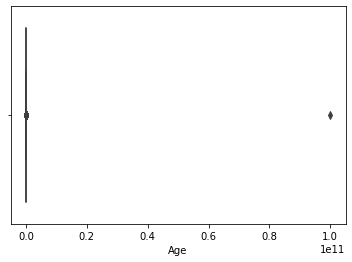

In [15]:
sns.boxplot(data['Age'])

- here in this dataset age is given  '__99999999999__', '__-1726__', tha'ts incorrect. So we are going to set the limits from 0 to 100.

#####    set the limit in Age columns

In [16]:


data.drop(data[data['Age'] < 0].index, inplace = True) 
data.drop(data[data['Age'] > 100].index, inplace = True) 

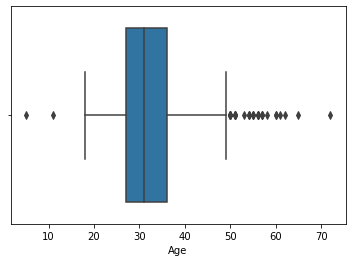

In [17]:
sns.boxplot(data['Age'])

###  Data Encoding 

- Applying LabelEncoder to the convert the data into numeric form.

In [18]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

data_ = data.iloc[:,1:]
encoded_data = data_.apply(LabelEncoder().fit_transform)

- Now we converted categorical data into numerical form.

In [19]:
 
fin_encoded_data = pd.concat([data['Age'],encoded_data], axis = 1) # pd.concat([df1,df2],axis =1)


In [20]:
fin_encoded_data.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,0,44,0,0,1,1,4,0,1,...,2,2,1,1,1,2,1,0,2,0
1,44,1,44,0,0,0,2,5,0,0,...,0,0,0,1,0,0,1,1,0,0
2,32,1,6,0,0,0,2,4,0,1,...,0,1,1,1,2,2,2,2,1,0
3,31,1,43,0,1,1,1,2,0,1,...,1,1,2,2,1,0,0,0,1,1
4,31,1,44,0,0,0,0,1,1,1,...,0,0,1,1,1,2,2,2,0,0


###  Summary of dataframe

In [21]:
country = data.groupby(data['Country'])

In [22]:
country['Age'].median().sort_values()

Country
Slovenia                  19.0
Georgia                   20.0
India                     23.0
Austria                   24.0
Bosnia and Herzegovina    25.0
Nigeria                   25.0
Uruguay                   26.0
Russia                    26.0
Moldova                   26.0
Israel                    26.0
Sweden                    27.0
Hungary                   27.0
Australia                 27.0
Colombia                  27.0
Bulgaria                  27.5
France                    28.0
Brazil                    28.0
Canada                    29.0
Romania                   29.0
Latvia                    29.0
Poland                    29.0
Singapore                 29.5
Spain                     30.0
Belgium                   30.0
Switzerland               30.0
Germany                   30.0
New Zealand               30.0
Philippines               31.0
Mexico                    31.0
United Kingdom            31.0
Ireland                   32.0
United States             32.0


- the median age of japan is the highest with 49.0 yrs.

In [23]:
country['treatment','remote_work','self_employed'].describe()

treatment                  remote_work              \
                           count unique  top freq       count unique  top   
Country                                                                     
Australia                     21      2  Yes   13          21      2   No   
Austria                        3      1   No    3           3      2  Yes   
Belgium                        6      2   No    5           6      1   No   
Bosnia and Herzegovina         1      1   No    1           1      1  Yes   
Brazil                         6      2   No    4           6      2   No   
Bulgaria                       4      2  Yes    2           4      2  Yes   
Canada                        72      2  Yes   37          72      2   No   
China                          1      1   No    1           1      1  Yes   
Colombia                       2      1   No    2           2      1   No   
Costa Rica                     1      1   No    1           1      1  Yes   
Croatia                        2      1  Yes    2           2      1  Yes   
Czech Republic                 1      1   No    1           1      1   No   
Denmark                        2      1  Yes    2           2      1   No   
Finland                        3      2   No    2           3      2   No   
France                        13      2   No   11          13      2   No   
Georgia                        1      1   No    1           1      1   No   
Germany                       45      2   No   24          45      2   No   
Greece                         2      1   No    2           2      1  Yes   
Hungary                        1      1   No    1           1      1  Yes   
India                         10      2   No    7          10      2   No   
Ireland                       27      2   No   14          27      2   No   
Israel                         5      1   No    5           5      1   No   
Italy                          7      2   No    6           7      1   No   
Japan                          1      1  Yes    1           1      1  Yes   
Latvia                         1      1   No    1           1      1   No   
Mexico                         3      2   No    2           3      2  Yes   
Moldova                        1      1  Yes    1           1      1   No   
Netherlands                   27      2   No   18          27      2   No   
New Zealand                    8      2  Yes    5           8      2   No   
Nigeria                        1      1   No    1           1      1   No   
Norway                         1      1   No    1           1      1   No   
Philippines                    1      1   No    1           1      1   No   
Poland                         7      2  Yes    4           7      2  Yes   
Portugal                       2      1   No    2           2      1   No   
Romania                        1      1   No    1           1      1  Yes   
Russia                         3      1   No    3           3      2   No   
Singapore                      4      2   No    3           4      2   No   
Slovenia                       1      1  Yes    1           1      1   No   
South Africa                   6      2  Yes    4           6      2   No   
Spain                          1      1   No    1           1      1   No   
Sweden                         7      2   No    5           7      1   No   
Switzerland                    7      2   No    4           7      1   No   
Thailand                       1      1   No    1           1      1   No   
United Kingdom               184      2   No   92         184      2   No   
United States                748      2  Yes  408         748      2   No   
Uruguay                        1      1   No    1           1      1  Yes   

                            self_employed                   
                       freq         count unique  top freq  
Country                                                     
Australia                13            21      2   No   19  
Austr

- From this we find out that countries like United states,Australia, and Canada have more surveyed people who undergo a treatment for mental problems.

- Here above we can see that most of the people  dont work at home or remotely which could be reason
for mental health(boredom, anxiety,degrading mental helath)

#### self_employed vs treatment

In [24]:
s_employ = data.groupby(['self_employed'])
s_employ['treatment'].describe()

,count,unique,top,freq
self_employed,,,,
No,1110,2,Yes,557
Yes,143,2,Yes,75


- We find regardless of whether a person is self_employed or not,it has no affect on the person recieving treatment for mental trauma.

#### treatment vs 'Age'

In [25]:
treat = data.groupby(data['treatment'])

treat['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
treatment,,,,,,,,
No,621.0,31.458937,7.084081,5.0,27.0,31.0,35.0,65.0
Yes,632.0,32.607595,7.558193,18.0,27.0,32.0,37.0,72.0


- We find that mean age of people recieving treatment is 32.5 years and there are some people who recieve treatment at a small age of even 8yrs and sometimes even as old as 72yrs.

#### treatment  vs  'tech_company' & 'work_interfere'

In [26]:
treat['tech_company', 'work_interfere'].describe()

tech_company                  work_interfere                       
                 count unique  top freq          count unique        top freq
treatment                                                                    
No                 621      2  Yes  517            621      4  Sometimes  366
Yes                632      2  Yes  510            632      4  Sometimes  361

- From this,we get to know that people who work in tech_company are  so much mentally affected by their work whether they are taking the medication or not.

- from this, we get to know sometimes mental health condition interfere in work whether person taking treatment or not.

- It is important to note that we are considering people who take medications or treatment as the people who are deeply mentally stressed .There may be cases where the health has degraded but may not prefer any medication.We are ignoring such cases.

#### tretment vs 'benefit' and 'care_options'

In [27]:
treat['benefits'].describe()

,count,unique,top,freq
treatment,,,,
No,621,3,Don't know,257
Yes,632,3,Yes,302


- from this, we get to know that some people don't know  that companies provide the mental health benefits to the person or not & those people are not taking treatment.

#### treatment vs wellness_program

In [28]:
treat['wellness_program'].describe()

,count,unique,top,freq
treatment,,,,
No,621,3,No,422
Yes,632,3,No,417


- from here we get know that people don't know mental health as part of an employee wellness_program.

#### How easy is to take medical 'leave' for a mental health condition?

In [29]:
pd.DataFrame(data['leave'].value_counts(normalize = True))

,leave
Don't know,0.447725
Somewhat easy,0.212291
Very easy,0.162809
Somewhat difficult,0.099761
Very difficult,0.077414


- here most of the people don't know about take a leave easy or not.

#### discussing a mental health issue with  employer would have negative consequences?

In [30]:
pd.DataFrame(data['mental_health_consequence'].value_counts(normalize = True))

,mental_health_consequence
No,0.390263
Maybe,0.379888
Yes,0.229848


- from here, approx 39% people thinks '__No__'  mental_health_consequences if they share.
- And 22% thinks that would be negative consequences.

#### discussing a physical health issue with your employer would have negative consequences?

In [31]:
pd.DataFrame(data['phys_health_consequence'].value_counts())

,phys_health_consequence
No,922
Maybe,273
Yes,58


#### discuss a mental health issue with your direct supervisor(s)

In [32]:
pd.DataFrame(data['supervisor'].value_counts(normalize = True))

,supervisor
Yes,0.409417
No,0.311253
Some of them,0.279330


- there are 40% people they like to discuss about mental health issue with supervisor.
- And 31% people they do not like to discuss about mental health issue with supervisor.

#### discuss a mental health issue with your coworkers?

In [33]:
pd.DataFrame(data['coworkers'].value_counts(normalize = True))

,coworkers
Some of them,0.616121
No,0.205906
Yes,0.177973


- There are 60%  of  people they like to discuss their mental health issue with coworkers.
- And 20% of people they do not like to discuss their mental health issue with coworkers.

#### mental health issue with a potential employer in an interview

In [34]:
pd.DataFrame(data['mental_health_interview'].value_counts(normalize=  True))

,mental_health_interview
No,0.802075
Maybe,0.165204
Yes,0.032721


- there are 80% of people they don't like to share mental health issues during interview.
- there are 3% of people they can share mental health issues during interview.

#### physical health issue with a potential employer in an interview?

In [35]:
pd.DataFrame(data['phys_health_interview'].value_counts(normalize = True))

,phys_health_interview
Maybe,0.443735
No,0.396648
Yes,0.159617


- there are 39% they don't share their physical health issues.
- there are 15% they can share physical healtn issues.

#### mentalvsphysical

In [36]:
pd.DataFrame(data['mental_vs_physical'].value_counts(normalize = True))

,mental_vs_physical
Don't know,0.458101
Yes,0.272147
No,0.269753


#### observe negative consequences for coworkers with mental health conditions in your workplace

In [37]:
pd.DataFrame(data['obs_consequence'].value_counts(normalize = True))

,obs_consequence
No,0.855547
Yes,0.144453


- there 85% people don't have negative consequence on mental health.
- 14% people have negative consequence.

# Visualization of data

#### Age distribution

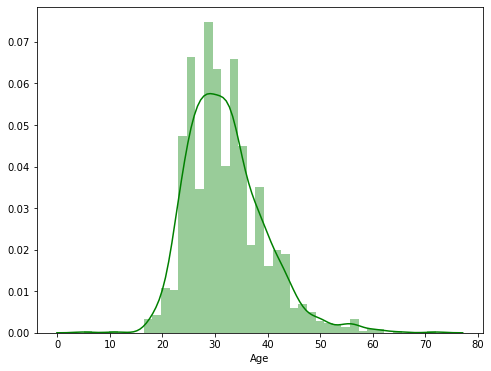

In [38]:
plt.figure(figsize = (8,6))
sns.distplot(data['Age'], color=  'g')

- Here we can see that most of age range between 18 to 60

#### treatment vs Gender

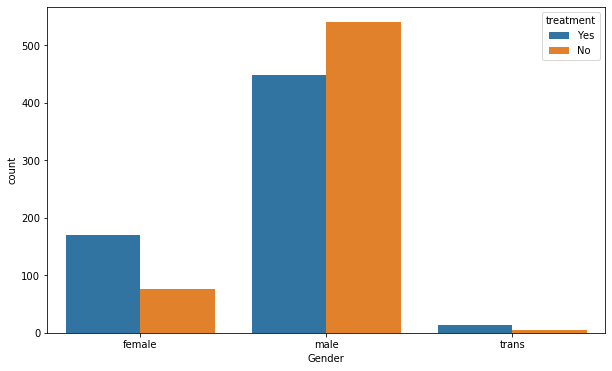

In [39]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'Gender', data = data,hue = 'treatment')
plt.show()

- Here we can see that most of female & transgender, they takes treatment for mental health compare to male.

#### country- wise gender ratio participating in the survey

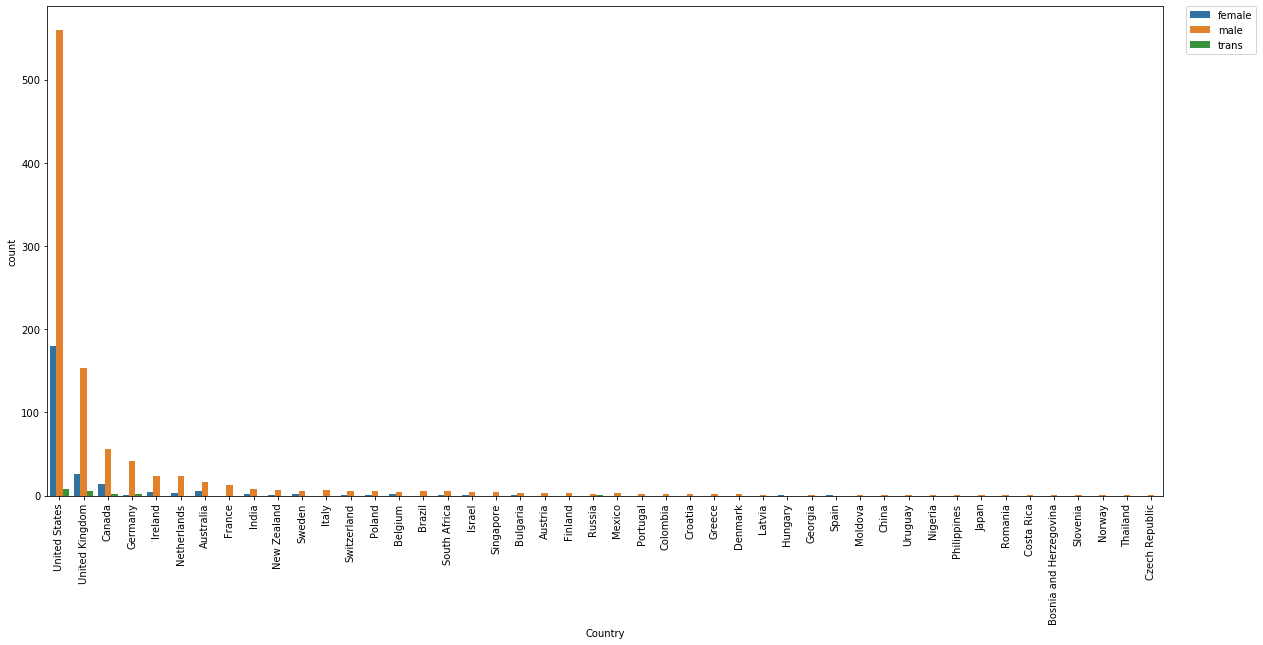

In [40]:

#shows that more number of males are working in tech companies all over the world
plt.figure(figsize= (20,9))
sns.countplot(x='Country', order= data['Country'].value_counts().index, hue='Gender', data=data)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=90)
plt.show()

- More number of males are working in tech companies all over the world.

#### country wise representation of data with focus on India

Text(10, 20.5, 'Mental Health Survey Participants from India')

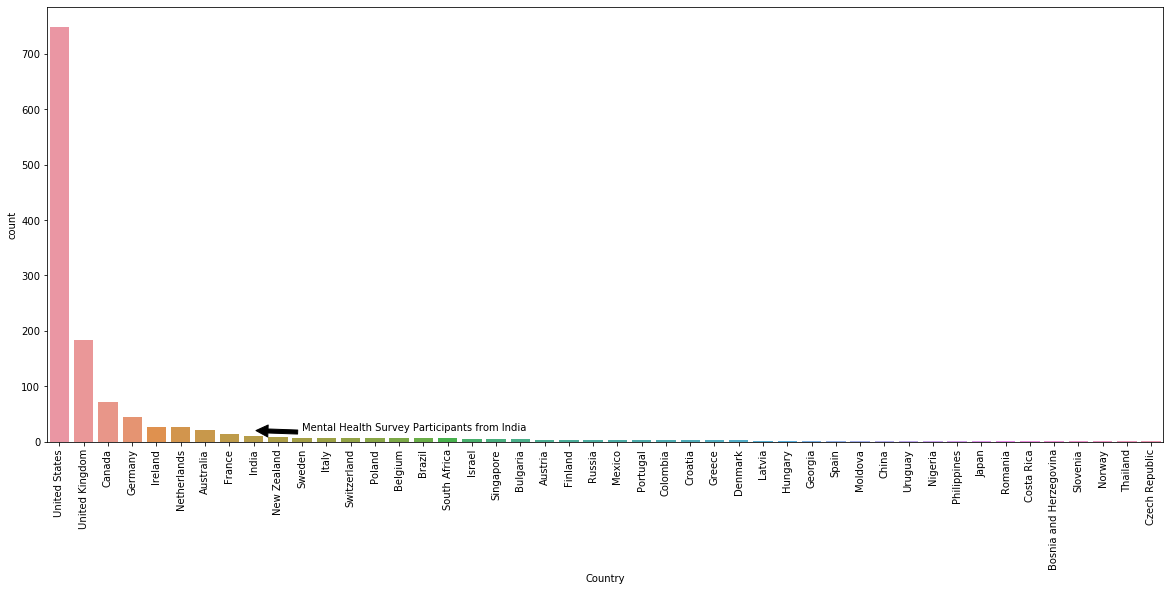

In [41]:

plt.figure(figsize=(20,8))
sns.countplot(data.Country, order= data['Country'].value_counts().index)
plt.xticks(rotation=90)
plt.annotate('Mental Health Survey Participants from India', xy=(8, 20), xytext=(10, 20.5),
             arrowprops=dict(facecolor='black', shrink=0.05),)

#### family_history

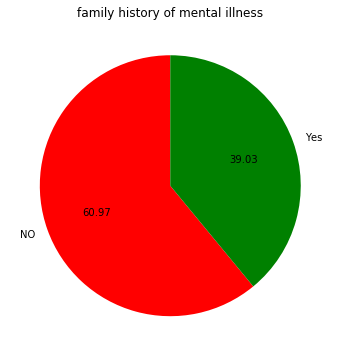

In [42]:
plt.figure(figsize = (10,6))
v = data['family_history'].value_counts()
plt.pie(v, autopct = '%0.02f', colors = ['r', 'g'], startangle = 90, labels= ['NO', 'Yes'])
plt.title('family history of mental illness')
plt.show()

- Here approx 40% have family history of mental illness.

#### family_history vs treatment

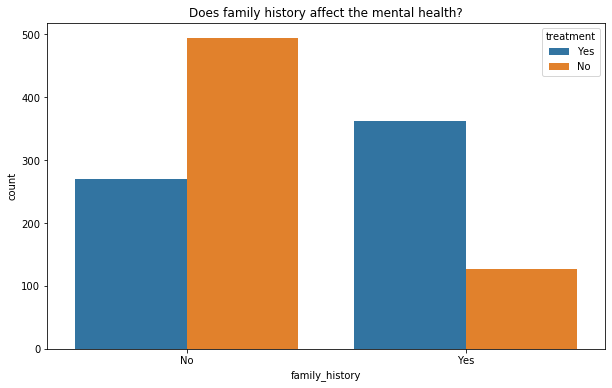

In [43]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'family_history', data = data, hue = 'treatment')
plt.title('Does family history affect the mental health?')
plt.show()

- More person go for the treatment if they have family history of mental illness.

#### work_interfere

- Mental health condition interferes with  work?

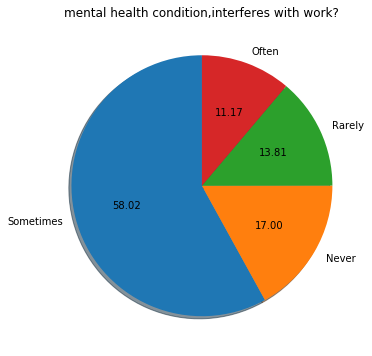

In [44]:
plt.figure(figsize = (10,6))
v = data['work_interfere'].value_counts()
label = ['Sometimes', 'Never', 'Rarely', 'Often']
plt.pie(v, labels = label, autopct = '%0.02f', radius = 1,shadow= True, startangle = 90)
plt.title('mental health condition,interferes with work?')
plt.show()


#### work_interfere vs treatment

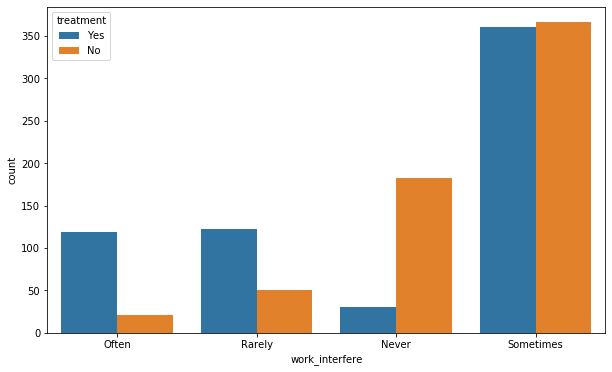

In [45]:
plt.figure(figsize = (10,6))
sns.countplot(x =  'work_interfere', data = data, hue = 'treatment')
plt.show()

#### Remote work

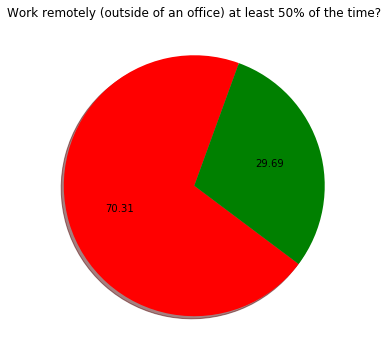

In [46]:
plt.figure(figsize = (10,6))
value = data['remote_work'].value_counts()
plt.pie(value, colors = ['r','g'], autopct=  '%0.02f', startangle = 70,shadow = True, radius = 1)
plt.title('Work remotely (outside of an office) at least 50% of the time?')
plt.show()

#### teech company

In [47]:
data['tech_company'].value_counts()

Yes    1027
No      226
Name: tech_company, dtype: int64

#### Benefits

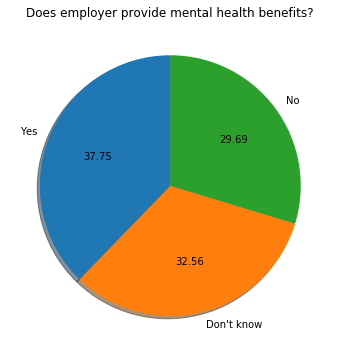

In [48]:
plt.figure(figsize = (10,6))
value = data['benefits'].value_counts()

plt.pie(value, autopct = '%0.02f', labels = ['Yes', 'Don\'t know', 'No'], startangle = 90, shadow = True)
plt.title('Does employer provide mental health benefits?')
plt.show()

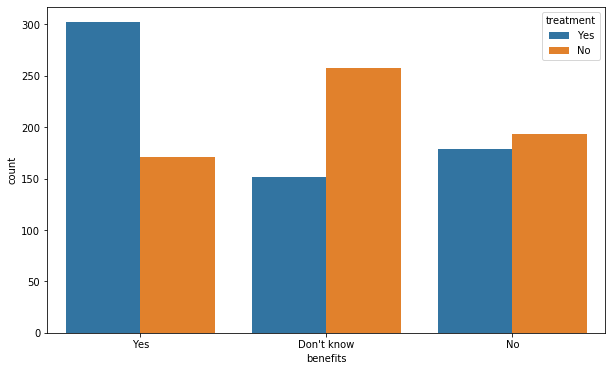

In [49]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'benefits', data = data, hue = 'treatment')
plt.show()

#### care_options

- Options for mental health care your employer provides

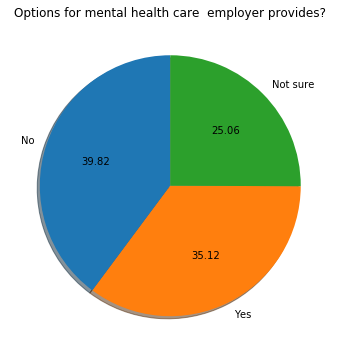

In [50]:
plt.figure(figsize = (10,6))
value = data['care_options'].value_counts()
plt.title('Options for mental health care  employer provides?')
plt.pie(value, autopct = '%0.02f', labels=  ['No', 'Yes', 'Not sure'], startangle = 90, shadow = True)
plt.show()

#### care_options vs treatment

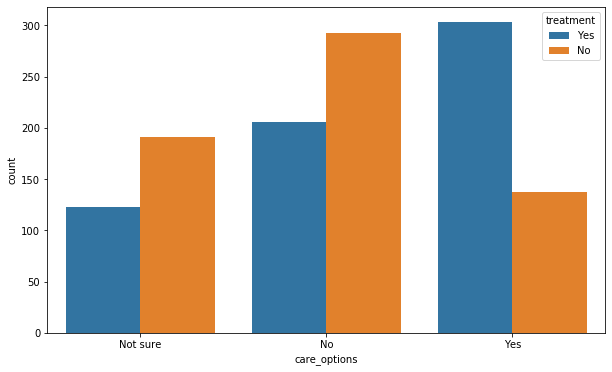

In [51]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'care_options', data = data, hue = 'treatment')
plt.show()

- From above we can see that if employeer provide '__care_option__'. Then most of the people also get mental health treatment.

### wellness_program

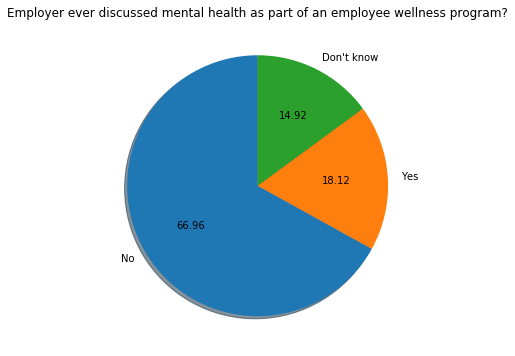

In [52]:
plt.figure(figsize = (10,6))
value = data['wellness_program'].value_counts()
plt.title('Employer ever discussed mental health as part of an employee wellness program?')
plt.pie(value, autopct = '%0.02f', labels=  ['No', 'Yes', 'Don\'t know'], startangle = 90, shadow = True)
plt.show()

#### wellness_program vs treatment

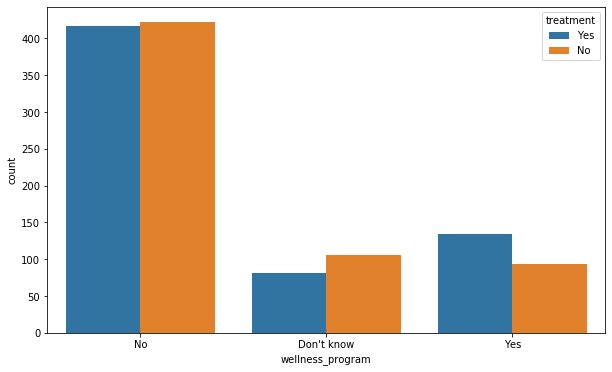

In [53]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'wellness_program', data = data, hue = 'treatment')
plt.show()

#### seek help

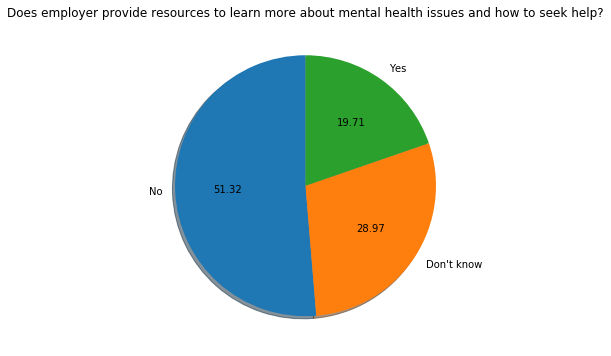

In [54]:
plt.figure(figsize = (10,6))
value = data['seek_help'].value_counts()
plt.title('Does employer provide resources to learn more about mental health issues and how to seek help?')
plt.pie(value, autopct = '%0.02f', labels=  ['No', 'Don\'t know', 'Yes'], startangle = 90, shadow = True)
plt.show()

#### anonymity

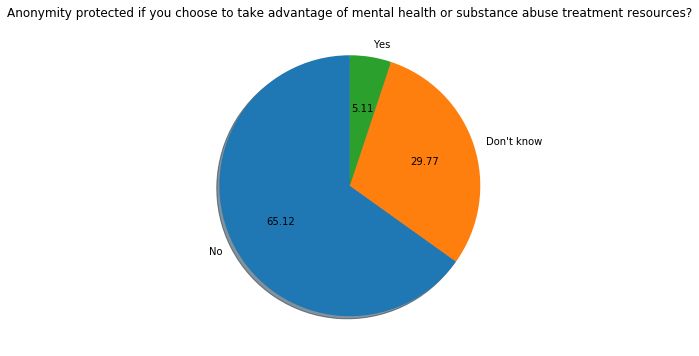

In [55]:
plt.figure(figsize = (10,6))
value = data['anonymity'].value_counts()
plt.title('Anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?')
plt.pie(value, autopct = '%0.02f', labels=  ['No', 'Don\'t know', 'Yes'], startangle = 90, shadow = True)
plt.show()

#### leave

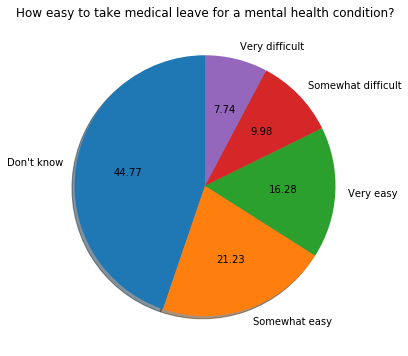

In [56]:
plt.figure(figsize = (10,6))
value = data['leave'].value_counts()
plt.title('How easy to take medical leave for a mental health condition?')
plt.pie(value, autopct = '%0.02f', labels=  ['Don\'t know', 'Somewhat easy', 'Very easy', 'Somewhat difficult', 'Very difficult'], startangle = 90, shadow = True)
plt.show()

#### mental_health_consequence

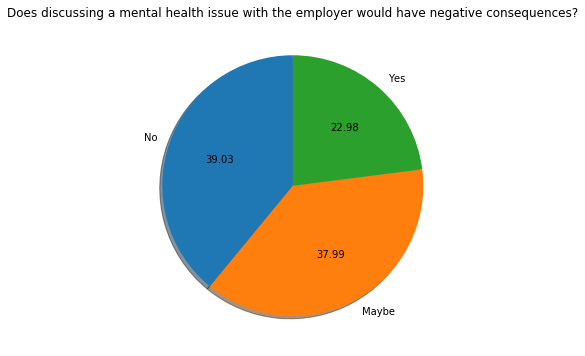

In [57]:
plt.figure(figsize = (10,6))
value = data['mental_health_consequence'].value_counts()
plt.title('Does discussing a mental health issue with the employer would have negative consequences?')
plt.pie(value, autopct = '%0.02f', labels=  ['No', 'Maybe', 'Yes'], startangle = 90, shadow = True)
plt.show()

#### phys_health_consequence

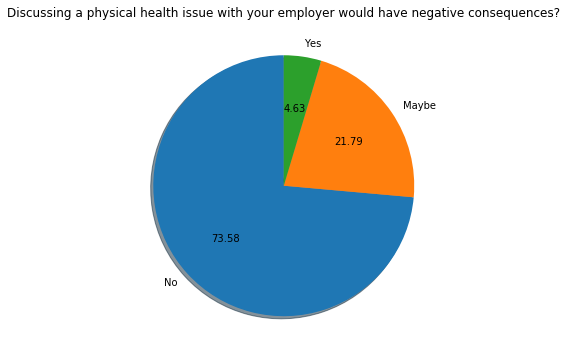

In [58]:
plt.figure(figsize = (10,6))
value = data['phys_health_consequence'].value_counts()
plt.title('Discussing a physical health issue with your employer would have negative consequences?')
plt.pie(value, autopct = '%0.02f', labels=  ['No', 'Maybe', 'Yes'], startangle = 90, shadow = True)
plt.show()

#### coworkers

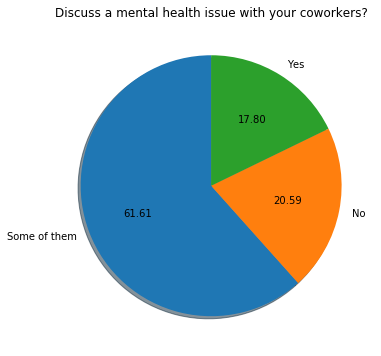

In [59]:
plt.figure(figsize = (10,6))
value = data['coworkers'].value_counts()
plt.title('Discuss a mental health issue with your coworkers?')
plt.pie(value, autopct = '%0.02f', labels=  ['Some of them', 'No', 'Yes'], startangle = 90, shadow = True)
plt.show()

#### supervisor

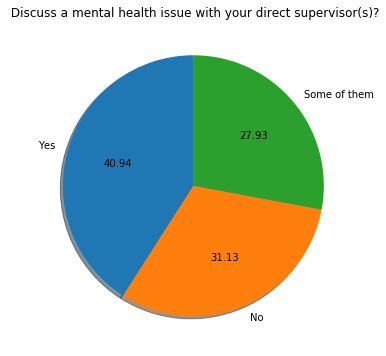

In [60]:
plt.figure(figsize = (10,6))
value = data['supervisor'].value_counts()
plt.title(' Discuss a mental health issue with your direct supervisor(s)?')
plt.pie(value, autopct = '%0.02f', labels=  ['Yes', 'No', 'Some of them'], startangle = 90, shadow = True)
plt.show()

#### mental_health_interview

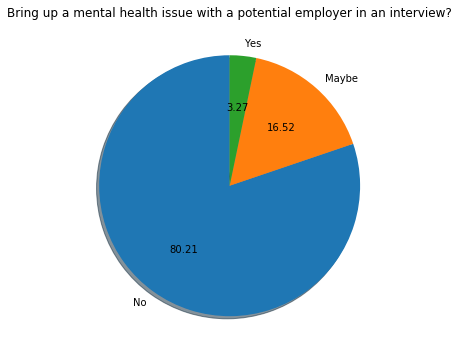

In [61]:
plt.figure(figsize = (10,6))
value = data['mental_health_interview'].value_counts()
plt.title('Bring up a mental health issue with a potential employer in an interview?')
plt.pie(value, autopct = '%0.02f', labels=  ['No', 'Maybe', 'Yes'], startangle = 90, shadow = True)
plt.show()

#### phys_health_interview

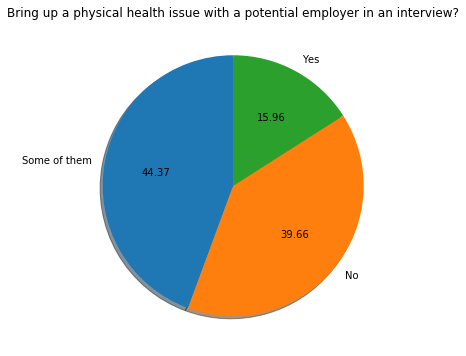

In [62]:
plt.figure(figsize = (10,6))
value = data['phys_health_interview'].value_counts()
plt.title('Bring up a physical health issue with a potential employer in an interview?')
plt.pie(value, autopct = '%0.02f', labels=  ['Some of them', 'No', 'Yes'], startangle = 90, shadow = True)
plt.show()

#### mental_vs_physical

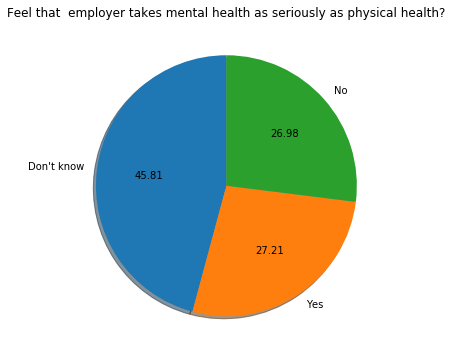

In [63]:
plt.figure(figsize = (10,6))
value = data['mental_vs_physical'].value_counts()
plt.title('Feel that  employer takes mental health as seriously as physical health?')
plt.pie(value, autopct = '%0.02f', labels=  ['Don\'t know', 'Yes', 'No'], startangle = 90, shadow = True)
plt.show()

#### obs_consequence

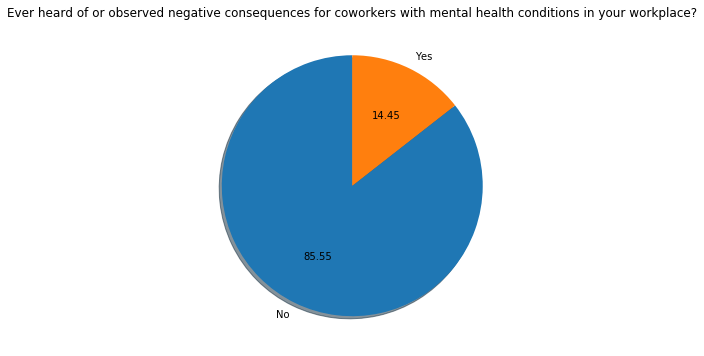

In [64]:
plt.figure(figsize = (10,6))
value = data['obs_consequence'].value_counts()
plt.title('Ever heard of or observed negative consequences for coworkers with mental health conditions in your workplace?')
plt.pie(value, autopct = '%0.02f', labels=  ['No', 'Yes'], startangle = 90, shadow = True)
plt.show()

# PLEASE DON'T FORGET TO UPVOTE!!!